## Results from Section 6.7.

Data is for 3D quantities using the normal FoV and the distribution method.  Comparison between the results using different numbers of kinematical bins. 

Model1 - 35 bins; Model2 - 15 bins; Model3 - 55 bins.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
from astropy.io import fits

## Results whitin  2.5R$_{\text{Eff}}$

In [2]:
# Column 0 for Jam result, Column 1 for dyLens 
subhalos = ["7", "8", "9", "11", "20", "56405", "56406", "83991",
            "83996", "84010", "100675", "116278", "172209", "313415", 
            "341482", "344595", "396742", "414107", "451938", "485608",
            "545285"]
Nsubhalos = len(subhalos)  # Number of subhalos

Mstar  = np.empty([Nsubhalos]) # "True" stellar mass
Mdm    = np.empty([Nsubhalos]) # "True" dm mass
Mtotal = np.empty([Nsubhalos]) # "True" total mass
Mfdm   = np.empty([Nsubhalos]) # "True" dark matter fraction


### JAM models

In [3]:
    # Where to store the Fractional difference
Jam_star_model1 = np.empty([Nsubhalos])       # JAM measurement of stellar mass 
Jam_star_model2 = np.empty([Nsubhalos])       # JAM measurement of stellar mass 
Jam_star_model3 = np.empty([Nsubhalos])       # JAM measurement of stellar mass 


Jam_DM_model1 = np.empty([Nsubhalos])         # JAM measurement of DM mass 
Jam_DM_model2 = np.empty([Nsubhalos])         # JAM measurement of DM mass 
Jam_DM_model3 = np.empty([Nsubhalos])         # JAM measurement of DM mass 

Jam_fdm_model1 = np.empty([Nsubhalos])        # JAM measurement of fDM mass 
Jam_fdm_model2 = np.empty([Nsubhalos])        # JAM measurement of fDM mass 
Jam_fdm_model3 = np.empty([Nsubhalos])        # JAM measurement of fDM mass

Jam_total_model1 = np.empty([Nsubhalos])      # JAM measurement of total mass 
Jam_total_model2 = np.empty([Nsubhalos])      # JAM measurement of total mass 
Jam_total_model3 = np.empty([Nsubhalos])      # JAM measurement of total mass

In [4]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model1 = json.load(f)
        f.close()
    
    with open("./{}/model2/normal/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model2 = json.load(f)
        f.close()
    
    with open("./{}/model3/normal/JAM/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model3 = json.load(f)
        f.close()
    

    
    Jam_star_model1[i] = model1["Dstar"]
    Jam_star_model2[i] = model2["Dstar"]
    Jam_star_model3[i] = model3["Dstar"]
    
    
    Jam_DM_model1[i] = model1["Ddm"]
    Jam_DM_model2[i] = model2["Ddm"]
    Jam_DM_model3[i] = model3["Ddm"]
    
    Jam_total_model1[i] = model1["Dtotal"]
    Jam_total_model2[i] = model2["Dtotal"]
    Jam_total_model3[i] = model3["Dtotal"]

    Jam_fdm_model1[i] = model1["Dfdm"]
    Jam_fdm_model2[i] = model2["Dfdm"]
    Jam_fdm_model3[i] = model3["Dfdm"]
    
    Mstar[i]  = model1["Mstar"]
    Mdm[i]    = model1["Mdm"]
    Mtotal[i] = model1["Mtotal"] 
    Mfdm[i]   = model1["fdm"]

In [5]:
# To make some plots

def median_hi_lo(dataset):
    # Return the median, hi and low percentiles
    p = np.percentile(dataset, [16, 50, 84])
    median = p[1]
    hi, lo = np.diff(p)
    
    return median, hi, lo

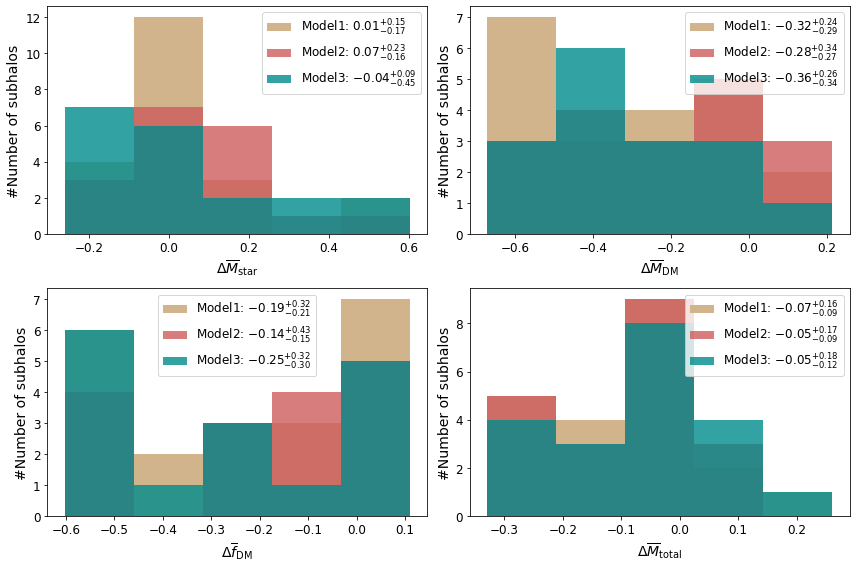

In [6]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adicionar os dados aos subplots
    # Stellar mass
m, hi, lo = median_hi_lo(Jam_star_model1)  
_, bins, _ = axs[0, 0].hist(Jam_star_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_star_model2)
axs[0, 0].hist(Jam_star_model2, bins=bins, density=False, alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_star_model3)
axs[0, 0].hist(Jam_star_model3, bins=bins, density=False, alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 0].set_ylabel("#Number of subhalos", size=14)
axs[0, 0].set_xlabel(r"${\Delta \overline{M}_{\rm star}}$", size=14)
axs[0, 0].legend(fontsize=12)




    # DM mass
m, hi, lo = median_hi_lo(Jam_DM_model1)  
_, bins, _ = axs[0, 1].hist(Jam_DM_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_DM_model2)  
axs[0, 1].hist(Jam_DM_model2, bins=bins, density=False,  alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_DM_model3)  
axs[0, 1].hist(Jam_DM_model3, bins=bins, density=False,  alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 1].set_ylabel("#Number of subhalos", size=14)
axs[0, 1].set_xlabel(r"${\Delta \overline{M}_{\rm DM}}$", size=14)
axs[0, 1].legend(fontsize=12)

    # DM fraction
m, hi, lo = median_hi_lo(Jam_fdm_model1)  
_, bins, _ = axs[1, 0].hist(Jam_fdm_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_fdm_model2)  
axs[1, 0].hist(Jam_fdm_model2, bins=bins, density=False,  alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_fdm_model3)  
axs[1, 0].hist(Jam_fdm_model3, bins=bins, density=False,  alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 0].set_ylabel("#Number of subhalos", size=14)
axs[1, 0].set_xlabel(r"${\Delta \overline{f}_{\rm DM}}$", size=14)
axs[1, 0].legend(fontsize=12)


    # Total mass
m, hi, lo = median_hi_lo(Jam_total_model1)  
_, bins, _ = axs[1, 1].hist(Jam_total_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_total_model2)  
axs[1, 1].hist(Jam_total_model2, bins=bins, density=False,  alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(Jam_total_model3)  
axs[1, 1].hist(Jam_total_model3, bins=bins, density=False,  alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 1].set_ylabel("#Number of subhalos", size=14)
axs[1, 1].set_xlabel(r"${\Delta \overline{M}_{\rm total}}$", size=14)
axs[1, 1].legend(fontsize=12)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

---

### dyLens models

In [7]:
# Where to store the Fractional difference
dyLens_star_model1 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 
dyLens_star_model2 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 
dyLens_star_model3 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 


dyLens_DM_model1 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 
dyLens_DM_model2 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 
dyLens_DM_model3 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 

dyLens_fdm_model1 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 
dyLens_fdm_model2 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 
dyLens_fdm_model3 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass

dyLens_total_model1 = np.empty([Nsubhalos])      # JAM measurement of total mass 
dyLens_total_model2 = np.empty([Nsubhalos])      # JAM measurement of total mass 
dyLens_total_model3 = np.empty([Nsubhalos])      # JAM measurement of total mass

In [8]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model1 = json.load(f)
        f.close()
    
    with open("./{}/model2/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model2 = json.load(f)
        f.close()
    
    with open("./{}/model3/normal/shear/dyLens/phase5/Analysis_2.5Reff/quantities.json".format(idNum)) as f:
        model3 = json.load(f)
        f.close()
    

    
    dyLens_star_model1[i] = model1["Dstar"]
    dyLens_star_model2[i] = model2["Dstar"]
    dyLens_star_model3[i] = model3["Dstar"]
    
    dyLens_DM_model1[i] = model1["Ddm"]
    dyLens_DM_model2[i] = model2["Ddm"]
    dyLens_DM_model3[i] = model3["Ddm"]
    
    dyLens_total_model1[i] = model1["Dtotal"]
    dyLens_total_model2[i] = model2["Dtotal"]
    dyLens_total_model3[i] = model3["Dtotal"]

    dyLens_fdm_model1[i] = model1["Dfdm"]
    dyLens_fdm_model2[i] = model2["Dfdm"]
    dyLens_fdm_model3[i] = model3["Dfdm"]
    
    Mstar[i]  = model1["Mstar"]
    Mdm[i]    = model1["Mdm"]
    Mtotal[i] = model1["Mtotal"] 
    Mfdm[i]   = model1["fdm"]

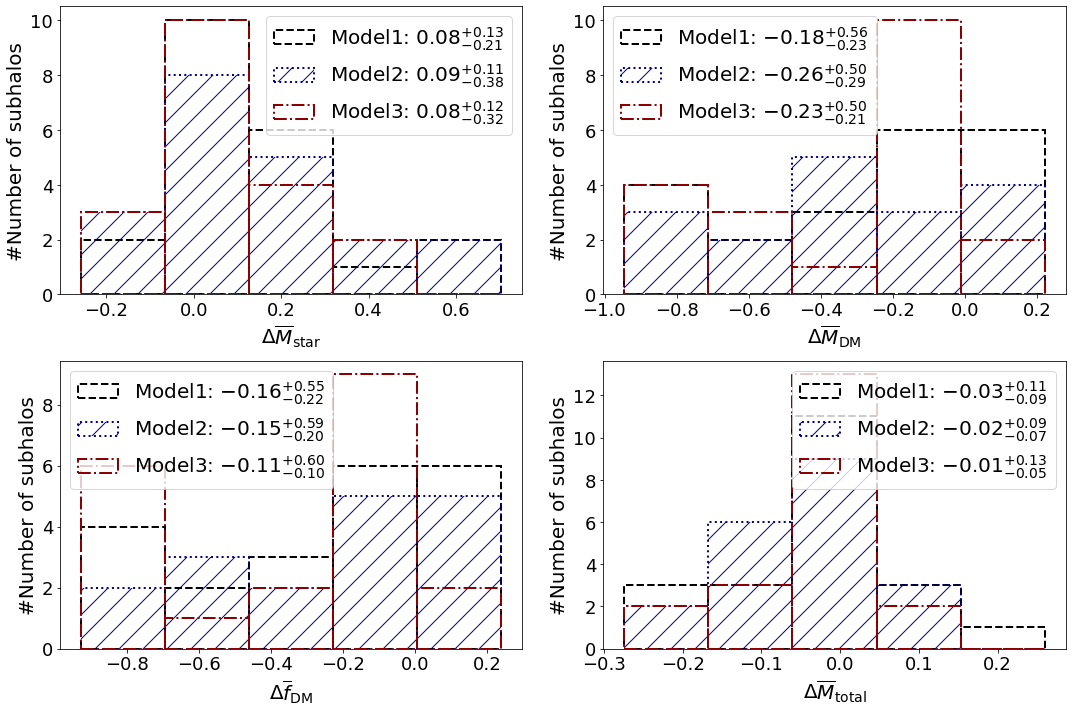

In [47]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Adicionar os dados aos subplots
    # Stellar mass
m, hi, lo = median_hi_lo(dyLens_star_model1)  
_, bins, _  = axs[0, 0].hist(dyLens_star_model1, bins=5, density=False, fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_star_model2)
axs[0, 0].hist(dyLens_star_model2, bins=bins, density=False, fill=False, hatch="/",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_star_model3)
axs[0, 0].hist(dyLens_star_model3, bins=bins, density=False, fill=False, 
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkred', linestyle='-.', linewidth=2)

axs[0, 0].set_ylabel("#Number of subhalos", size=20)
axs[0, 0].set_xlabel(r"${\Delta \overline{M}_{\rm star}}$", size=20)
axs[0, 0].legend(fontsize=20)


    # DM mass
m, hi, lo = median_hi_lo(dyLens_DM_model1)  
_, bins, _  = axs[0, 1].hist(dyLens_DM_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_DM_model2)  
axs[0, 1].hist(dyLens_DM_model2, bins=bins, density=False,  fill=False, hatch="/",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)


m, hi, lo = median_hi_lo(dyLens_DM_model3)  
axs[0, 1].hist(dyLens_DM_model3, bins=bins, density=False,  fill=False, 
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkred', linestyle='-.', linewidth=2)


axs[0, 1].set_ylabel("#Number of subhalos", size=20)
axs[0, 1].set_xlabel(r"${\Delta \overline{M}_{\rm DM}}$", size=20)
axs[0, 1].legend(fontsize=20)

    # DM fraction
m, hi, lo = median_hi_lo(dyLens_fdm_model1)  
_, bins, _  = axs[1, 0].hist(dyLens_fdm_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_fdm_model2)  
axs[1, 0].hist(dyLens_fdm_model2, bins=bins, density=False,   fill=False, hatch="/",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)


m, hi, lo = median_hi_lo(dyLens_fdm_model3)  
axs[1, 0].hist(dyLens_fdm_model3, bins=bins, density=False,  fill=False, 
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkred', linestyle='-.', linewidth=2)


axs[1, 0].set_ylabel("#Number of subhalos", size=20)
axs[1, 0].set_xlabel(r"${\Delta \overline{f}_{\rm DM}}$", size=20)
axs[1, 0].legend(fontsize=20, loc='upper left')


    # Total mass
m, hi, lo = median_hi_lo(dyLens_total_model1)  
_, bins, _  = axs[1, 1].hist(dyLens_total_model1, bins=5, density=False,  fill=False,
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='black',linestyle='--',  linewidth=2)

m, hi, lo = median_hi_lo(dyLens_total_model2)  
axs[1, 1].hist(dyLens_total_model2, bins=bins, density=False,  fill=False, hatch="/",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkblue',linestyle=':',  linewidth=2)


m, hi, lo = median_hi_lo(dyLens_total_model3)  
axs[1, 1].hist(dyLens_total_model3, bins=bins, density=False,  fill=False, 
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo), edgecolor='darkred', linestyle='-.', linewidth=2)


axs[1, 1].set_ylabel("#Number of subhalos", size=20)
axs[1, 1].set_xlabel(r"${\Delta \overline{M}_{\rm total}}$", size=20)
axs[1, 1].legend(fontsize=20)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()
plt.savefig('/home/carlosmelo/Desktop/plots/bins_comparison_dyLens_3D.png', dpi=600,  bbox_inches='tight') 

------

## Results whitin  R$_{\text{Eins}}$

### dyLens models

In [10]:
# Where to store the Fractional difference
dyLens_star_model1 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 
dyLens_star_model2 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 
dyLens_star_model3 = np.empty([Nsubhalos])       # dyLens measurement of stellar mass 


dyLens_DM_model1 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 
dyLens_DM_model2 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 
dyLens_DM_model3 = np.empty([Nsubhalos])         # dyLens measurement of DM mass 

dyLens_fdm_model1 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 
dyLens_fdm_model2 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass 
dyLens_fdm_model3 = np.empty([Nsubhalos])        # dyLens measurement of fDM mass

dyLens_total_model1 = np.empty([Nsubhalos])      # JAM measurement of total mass 
dyLens_total_model2 = np.empty([Nsubhalos])      # JAM measurement of total mass 
dyLens_total_model3 = np.empty([Nsubhalos])      # JAM measurement of total mass

In [11]:
for i, idNum in enumerate(subhalos):

    with open("./{}/model1/normal/shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        model1 = json.load(f)
        f.close()
    
    with open("./{}/model2/normal/shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        model2 = json.load(f)
        f.close()
    
    with open("./{}/model3/normal/shear/dyLens/phase5/Analysis_Re/quantities.json".format(idNum)) as f:
        model3 = json.load(f)
        f.close()
    

    
    dyLens_star_model1[i] = model1["Dstar"]
    dyLens_star_model2[i] = model2["Dstar"]
    dyLens_star_model3[i] = model3["Dstar"]
    
    dyLens_DM_model1[i] = model1["Ddm"]
    dyLens_DM_model2[i] = model2["Ddm"]
    dyLens_DM_model3[i] = model3["Ddm"]
    
    dyLens_total_model1[i] = model1["Dtotal"]
    dyLens_total_model2[i] = model2["Dtotal"]
    dyLens_total_model3[i] = model3["Dtotal"]

    dyLens_fdm_model1[i] = model1["Dfdm"]
    dyLens_fdm_model2[i] = model2["Dfdm"]
    dyLens_fdm_model3[i] = model3["Dfdm"]
    
    Mstar[i]  = model1["Mstar"]
    Mdm[i]    = model1["Mdm"]
    Mtotal[i] = model1["Mtotal"] 
    Mfdm[i]   = model1["fdm"]

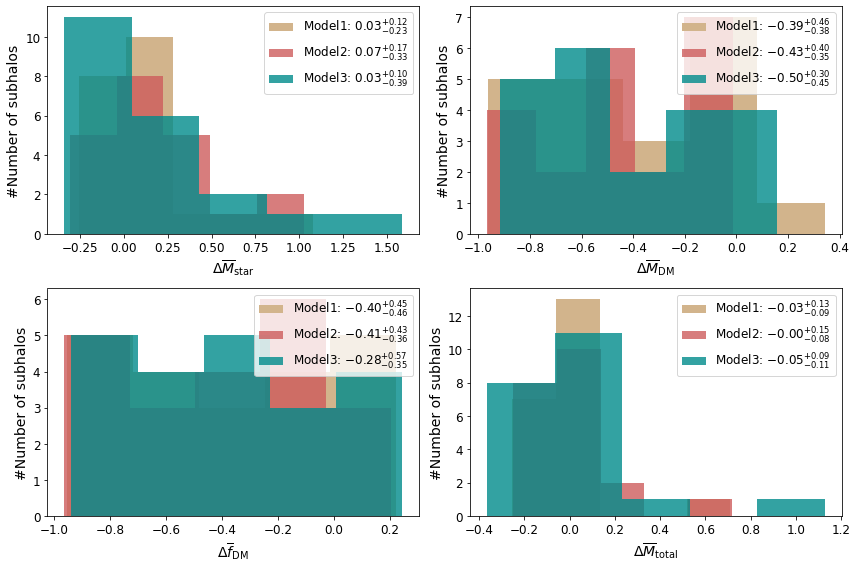

In [12]:
## Bias as a function of the Triaxiality

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Criar a figura com subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Adicionar os dados aos subplots
    # Stellar mass
m, hi, lo = median_hi_lo(dyLens_star_model1)  
axs[0, 0].hist(dyLens_star_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_star_model2)
axs[0, 0].hist(dyLens_star_model2, bins=5, density=False, alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_star_model3)
axs[0, 0].hist(dyLens_star_model3, bins=5, density=False, alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 0].set_ylabel("#Number of subhalos", size=14)
axs[0, 0].set_xlabel(r"${\Delta \overline{M}_{\rm star}}$", size=14)
axs[0, 0].legend(fontsize=12)




    # DM mass
m, hi, lo = median_hi_lo(dyLens_DM_model1)  
axs[0, 1].hist(dyLens_DM_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_DM_model2)  
axs[0, 1].hist(dyLens_DM_model2, bins=5, density=False,  alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_DM_model3)  
axs[0, 1].hist(dyLens_DM_model3, bins=5, density=False,  alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[0, 1].set_ylabel("#Number of subhalos", size=14)
axs[0, 1].set_xlabel(r"${\Delta \overline{M}_{\rm DM}}$", size=14)
axs[0, 1].legend(fontsize=12)

    # DM fraction
m, hi, lo = median_hi_lo(dyLens_fdm_model1)  
axs[1, 0].hist(dyLens_fdm_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_fdm_model2)  
axs[1, 0].hist(dyLens_fdm_model2, bins=5, density=False,  alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_fdm_model3)  
axs[1, 0].hist(dyLens_fdm_model3, bins=5, density=False,  alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 0].set_ylabel("#Number of subhalos", size=14)
axs[1, 0].set_xlabel(r"${\Delta \overline{f}_{\rm DM}}$", size=14)
axs[1, 0].legend(fontsize=12)


    # Total mass
m, hi, lo = median_hi_lo(dyLens_total_model1)  
axs[1, 1].hist(dyLens_total_model1, bins=5, density=False,  color="tan",
                 label="Model1: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_total_model2)  
axs[1, 1].hist(dyLens_total_model2, bins=5, density=False,  alpha=0.8, color="indianred",
                 label="Model2: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

m, hi, lo = median_hi_lo(dyLens_total_model3)  
axs[1, 1].hist(dyLens_total_model3, bins=5, density=False,  alpha=0.8, color="darkcyan",
                 label="Model3: $%.2f^{+%.2f}_{-%.2f}$"%(m, hi,lo))

axs[1, 1].set_ylabel("#Number of subhalos", size=14)
axs[1, 1].set_xlabel(r"${\Delta \overline{M}_{\rm total}}$", size=14)
axs[1, 1].legend(fontsize=12)

# Adicionar uma única legenda para todos os subplots
#fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True)

# Ajustar o layout
plt.tight_layout()

----